In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_comp%_salary_17-18')

In [3]:
qbs.dtypes

NAME           object
COMP%         float64
COMP%_rank    float64
salary          int64
dtype: object

In [4]:
qbs.head()

,NAME,COMP%,COMP%_rank,salary
0,Landry Jones,82.1,2.0,2200000
1,Sam Bradford,74.4,3.0,18000000
2,Drew Brees,72.0,4.0,24250000
3,Case Keenum,67.6,5.0,2000000
4,Alex Smith,67.5,6.0,17000000


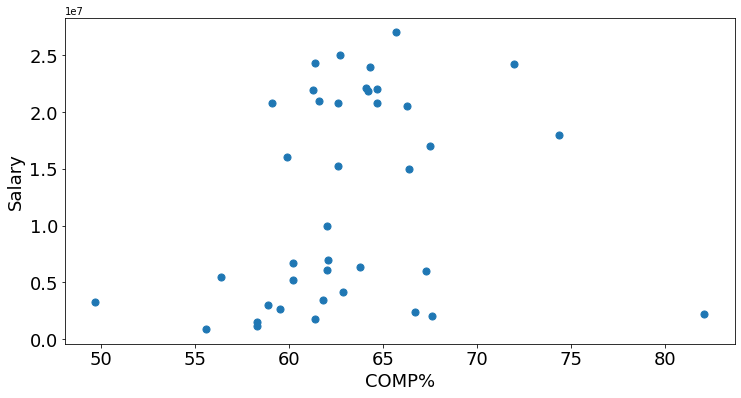

In [5]:
ax = qbs.plot(kind="scatter", x = 'COMP%',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('COMP%', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['COMP%', 'salary']])

In [7]:
X.mean(axis = 0)

array([-9.22339128e-16,  1.13869028e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.22126179, -1.09060068],
       [ 0.06434078,  0.96916735],
       [ 1.90130143,  0.99478144],
       [ 0.0058129 , -0.80830542],
       [ 3.58268163, -1.13153789]])

In [11]:
km.predict(X)

array([4, 2, 2, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3,
       3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,COMP%,COMP%_rank,salary,clusters
0,Landry Jones,82.1,2.0,2200000,4
1,Sam Bradford,74.4,3.0,18000000,2
2,Drew Brees,72.0,4.0,24250000,2
3,Case Keenum,67.6,5.0,2000000,3
4,Alex Smith,67.5,6.0,17000000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[5.66714286e+01, 2.56435571e+06],
       [6.34764706e+01, 2.08970255e+07],
       [7.32000000e+01, 2.11250000e+07],
       [6.31666667e+01, 5.07688417e+06],
       [8.21000000e+01, 2.20000000e+06]])

In [14]:
qbs.groupby('clusters')[['COMP%', 'salary']].mean()

,COMP%,salary
clusters,,
0,56.671429,2.564356e+06
1,63.476471,2.089703e+07
2,73.200000,2.112500e+07
3,63.166667,5.076884e+06
4,82.100000,2.200000e+06


In [15]:
centroids = qbs.groupby('clusters')[['COMP%', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

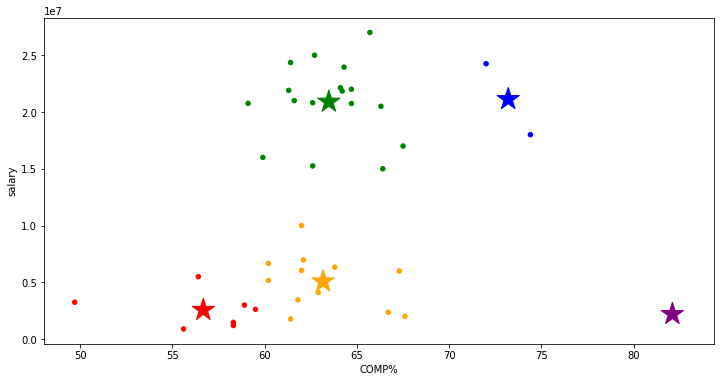

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'COMP%', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'COMP%', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

12.02978463567475

In [18]:
silhouette_score(X, km.labels_)

0.4675220814146843